In [2]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import requests

In [3]:
def get_json(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

In [4]:
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+ record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


<ipython-input-4-ad35ddc27538>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))


In [5]:
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'] , format='%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x: x.date())
print(df_covid_worldwide.head())

  country last_update    cases  deaths  recovered
0      US  2020-08-16  5401167  170019    1833067
1      BR  2020-08-16  3340197  107852    2655017
2      IN  2020-08-16  2589682   49980    1862258
3      RU  2020-08-16   920719   15653     731444
4      ZA  2020-08-16   587345   11839     472377


In [6]:
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries=df_countries.rename(columns={'alpha2':'country'})
df_countries=df_countries[['name','country']]
print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


<ipython-input-6-51abaac8ca82>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_countries = pd.io.json.json_normalize(get_json(countries_url))


In [7]:
df_covid_denormalized = pd.merge(df_covid_worldwide , df_countries , on='country')
print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name
0      US  2020-08-16  5401167  170019    1833067  United States of America
1      BR  2020-08-16  3340197  107852    2655017                    Brazil
2      IN  2020-08-16  2589682   49980    1862258                     India
3      RU  2020-08-16   920719   15653     731444        Russian Federation
4      ZA  2020-08-16   587345   11839     472377              South Africa


In [8]:
#fatality ratio = death/case
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths'] / df_covid_denormalized['cases']
print(df_covid_denormalized.head())

  country last_update    cases  deaths  recovered                      name  \
0      US  2020-08-16  5401167  170019    1833067  United States of America   
1      BR  2020-08-16  3340197  107852    2655017                    Brazil   
2      IN  2020-08-16  2589682   49980    1862258                     India   
3      RU  2020-08-16   920719   15653     731444        Russian Federation   
4      ZA  2020-08-16   587345   11839     472377              South Africa   

   fatality_ratio  
0        0.031478  
1        0.032289  
2        0.019300  
3        0.017001  
4        0.020157  


In [9]:
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio'  , ascending=False).head(20)
print(df_top_20_fatality_rate)

    country last_update   cases  deaths  recovered  \
134      YE  2020-08-16    1869     530       1013   
11       GB  2020-08-16  320343   46791       1486   
16       IT  2020-08-16  253915   35396     203786   
36       BE  2020-08-16   77869    9935      17981   
105      HU  2020-08-16    4916     608       3623   
17       FR  2020-08-16  252965   30410      83993   
6        MX  2020-08-16  517714   56543     418164   
191      EH  2020-08-16      10       1          8   
40       NL  2020-08-16   64451    6194        345   
10       ES  2020-08-16  342813   28617     150376   
153      TD  2020-08-16     956      76        865   
23       CA  2020-08-16  124004    9074     110202   
33       SE  2020-08-16   84294    5783          0   
145      LR  2020-08-16    1257      82        788   
65       IE  2020-08-16   27257    1774      23364   
80       SD  2020-08-16   12314     798       6350   
157      SM  2020-08-16     699      42        657   
26       EC  2020-08-16  101

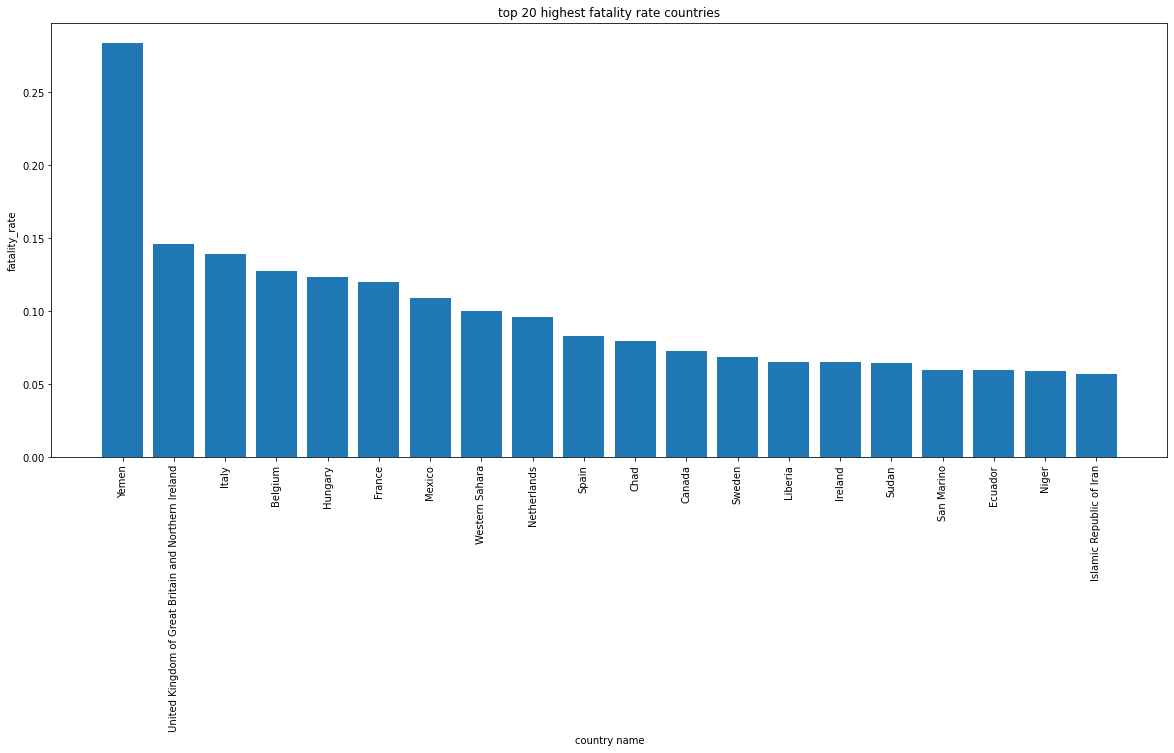

In [10]:
#visualization
x = df_top_20_fatality_rate['name']
y = df_top_20_fatality_rate['fatality_ratio']
plt.figure(figsize=(20,8))
plt.bar(x,y)
plt.xlabel('country name')
plt.ylabel('fatality_rate')
plt.title('top 20 highest fatality rate countries')
plt.xticks(rotation=90)
plt.show()

In [11]:
countries = ['ID','MY','SG','TH','VN']
i = 0
for country in countries:
    covid_timeline_url = 'https://covid19-api.org/api/timeline/' + country
    df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
    df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'] , format='%Y-%m-%d %H:%M:%S')
    df_covid_timeline['last_update'] = df_covid_timeline['last_update'].apply(lambda x: x.date())
    if i==0:
        df_covid_timeline_merged =  df_covid_timeline
    else:
        df_covid_timeline_merged =  df_covid_timeline.append(df_covid_timeline_merged , ignore_index=True)
    i = i+1
print(df_covid_timeline_merged)

<ipython-input-11-596795edcb02>:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))


     country last_update  cases  deaths  recovered
0         VN  2020-11-26   1331      35       1166
1         VN  2020-11-25   1321      35       1153
2         VN  2020-11-24   1316      35       1153
3         VN  2020-11-23   1312      35       1151
4         VN  2020-11-22   1307      35       1142
...      ...         ...    ...     ...        ...
1423      ID  2020-03-10     27       0          2
1424      ID  2020-03-09     19       0          0
1425      ID  2020-03-08      6       0          0
1426      ID  2020-03-06      4       0          0
1427      ID  2020-03-02      2       0          0

[1428 rows x 5 columns]


In [21]:
df_covid_timeline_denormalized = pd.merge(df_countries , df_covid_timeline_merged , on='country')
for i in range(len(df_covid_timeline_denormalized)):
    if df_covid_timeline_denormalized['last_update'][i] != '2020-11-26' :
        df_covid_timeline_denormalized_new = df_covid_timeline_denormalized
    elif df_covid_timeline_denormalized['last_update'][i] == '2020-11-26':
        df_covid_timeline_denormalized_new = df_covid_timeline_denormalized.append(df_covid_timeline_denormalized_new)
print(df_covid_timeline_denormalized_new)

           name country last_update   cases  deaths  recovered
0     Indonesia      ID  2020-11-26  516753   16352     433649
1     Indonesia      ID  2020-11-25  511836   16225     429807
2     Indonesia      ID  2020-11-24  506302   16111     425313
3     Indonesia      ID  2020-11-23  502110   16002     422386
4     Indonesia      ID  2020-11-22  497668   15884     418188
...         ...     ...         ...     ...     ...        ...
1423   Viet Nam      VN  2020-01-27       2       0          0
1424   Viet Nam      VN  2020-01-26       2       0          0
1425   Viet Nam      VN  2020-01-25       2       0          0
1426   Viet Nam      VN  2020-01-24       2       0          0
1427   Viet Nam      VN  2020-01-23       2       0          0

[1428 rows x 6 columns]
